# 1교시

## 1. 단순선형회귀에서 회귀선에 대한 공식은?(찾고자 하는 회귀선의 식은?)

## 2. data, feature_names를 써서 데이터프레임으로 만드세요. 

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets

data=datasets.load_diabetes()

In [13]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [14]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
df = pd.DataFrame(data.data,columns=data.feature_names)

## 2-2. target을 칼럼에 추가하세요

In [ ]:
df['target'] = data.target

df

## 2-3. x=bm1, y=target 일 때, 단순선형회귀분석을 하세요

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [26]:
lr.fit(X=df['bmi'].values.reshape(-1, 1), y=df['target'])

LinearRegression()

In [27]:
# 기울기 a = .coef_
lr.fit(X=df['bmi'].values.reshape(-1, 1), y=df['target']).coef_


array([949.43526038])

In [31]:
# y절편 = .intercept_
lr.fit(X=df['bmi'].values.reshape(-1, 1), y=df['target']).intercept_

152.13348416289617

In [28]:
import matplotlib.pyplot as plt

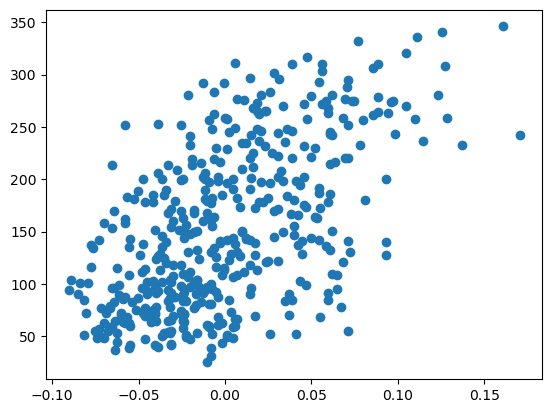

In [30]:
plt.scatter(x=df['bmi'],y=df['target'])

In [32]:
## 2-4. coef_와 intercept_ 를 이용해 빨간 회귀선을 그리세요

In [33]:
coef_fit = lr.fit(X=df['bmi'].values.reshape(-1, 1), y=df['target']).coef_

In [44]:
intercept_fit = lr.fit(X=df['bmi'].values.reshape(-1, 1), y=df['target']).intercept_
intercept_fit

152.13348416289617

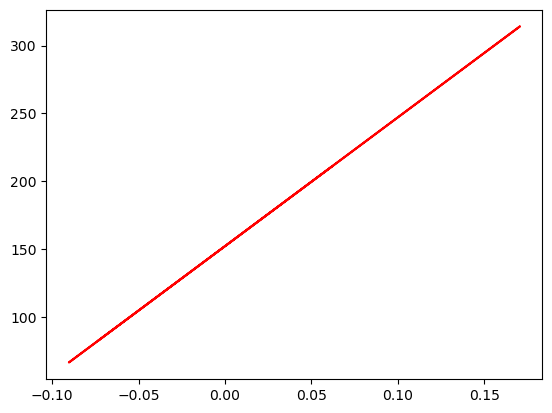

In [45]:
plt.plot(df[['bmi']],coef_fit * df[['bmi']] + intercept_fit, color = 'red')

In [47]:
## 3. sleep.csv 을 받아서 열오보세요

In [52]:
sleep_df = pd.read_csv('sleep.csv')
sleep_df[:5]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## 3-2. ID, Bedtime,	Wakeup time, REM sleep percentage	Deep sleep percentage,	Light sleep percentage 열과 결측치가 있는 행을 삭제하세요

In [54]:
sleep_df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [55]:
sleep_df.drop(['ID', 'Bedtime', 'Wakeup time', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage'], axis = 1, inplace = True)
sleep = sleep_df.dropna() 

In [56]:
sleep

,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,6.0,0.88,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...
445,30,Female,7.5,0.53,4.0,50.0,2.0,Yes,1.0
447,27,Female,7.5,0.91,0.0,0.0,0.0,No,5.0
448,52,Male,6.0,0.74,4.0,25.0,0.0,No,3.0
450,45,Male,7.0,0.76,3.0,0.0,0.0,No,3.0


In [58]:
sleep.isna().sum()

Age                     0
Gender                  0
Sleep duration          0
Sleep efficiency        0
Awakenings              0
Caffeine consumption    0
Alcohol consumption     0
Smoking status          0
Exercise frequency      0
dtype: int64

In [60]:
## 3-3. sleep 데이터 중 Gender와 smoking status 열을 원핫인코딩하여 객체에 저장하시오

In [61]:
sleep_ohe = pd.get_dummies(sleep,columns=['Gender','Smoking status'])

In [63]:
sleep_ohe[:5]

,Age,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,65,6.0,0.88,0.0,0.0,0.0,3.0,1,0,0,1
1,69,7.0,0.66,3.0,0.0,3.0,3.0,0,1,0,1
2,40,8.0,0.89,1.0,0.0,0.0,3.0,1,0,1,0
3,40,6.0,0.51,3.0,50.0,5.0,1.0,1,0,0,1
4,57,8.0,0.76,3.0,0.0,3.0,3.0,0,1,1,0


## 3-3. target을 Sleep efficiency로, 나머지는 feature로 하여 8:2 로 train_test_split() 해주세요 

In [64]:
from sklearn.model_selection import train_test_split

In [77]:
X = sleep.drop('Sleep efficiency', axis= 1) # feature
y = sleep['Sleep efficiency']               # target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

In [67]:
## 3-4. 회귀트리로 그리드서치하여 최적의 하이퍼파라미터와 그 때의 RMSE를 출력하세요

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt_reg = DecisionTreeRegressor()

parameters = {'max_depth' : [2,3,4,5],
              'min_samples_split' : [2,3,4],
              'min_samples_leaf' : [1,2,3]
             }

grid_dt = GridSearchCV(dt_reg, param_grid = parameters, cv =5, n_jobs = -1 )


grid_dt.fit(X_train,y_train)

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Male'


# 2교시 : 432p ~ : 군집화

In [ ]:
from sklearn.cluster import KMeans

iris

iris_df = iris.data

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris_df)

kmeans.labels_

pd.Series(kmeans.labels_).value_counts()

In [83]:
# 438p

from sklearn.datasets import make_blobs

In [85]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [88]:
print(X.shape,y.shape)

(200, 2) (200,)


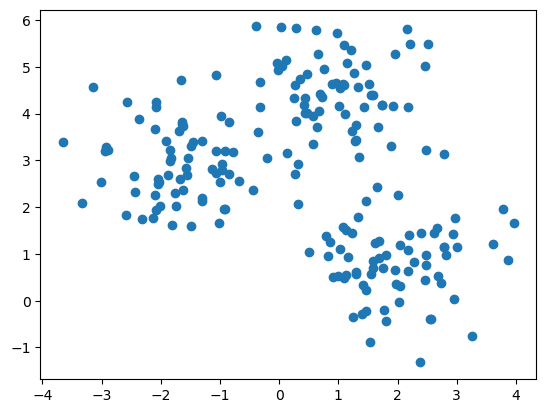

In [87]:
plt.scatter(X[:,0], X[:,1])

In [266]:
X

array([[ 0.51978115, -0.01598068],
       [-0.05771881, -0.42027869],
       [-0.80515504, -0.66222735],
       ...,
       [-0.01203593,  0.39675461],
       [ 0.39812882,  0.31898151],
       [-0.36606628,  0.33958861]])

In [267]:
clusterDF

,ftr1,ftr2,target,kmeans_cluster,gmm_cluster,kmeans_label,meanshift_label
0,0.519781,-0.015981,1,0,1,0,0
1,-0.057719,-0.420279,1,0,1,0,0
2,-0.805155,-0.662227,0,0,0,0,0
3,0.316549,0.312730,1,1,1,1,0
4,-0.304804,0.407563,1,1,0,1,0
...,...,...,...,...,...,...,...
995,-0.222906,-0.326809,1,0,0,0,0
996,-0.766648,0.677558,0,1,0,1,0
997,-0.012036,0.396755,1,1,0,1,0
998,0.398129,0.318982,1,1,1,1,0


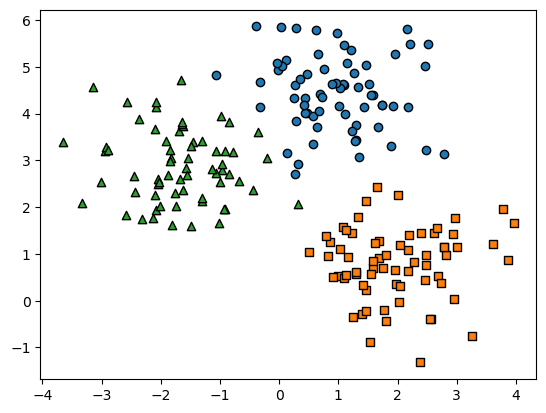

In [89]:
# 439p
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
target_list = np.unique(y)
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show() 

In [93]:
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


### clusterDF를 3개의 군집으로 나누어 봅시다.

In [98]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter=200, random_state=0)

In [99]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [116]:
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [101]:
clusterDF['kmeans_labels'] = cluster_labels

In [102]:
clusterDF

,ftr1,ftr2,target,kmeans_labels
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


### 군집평가 : 441p ~

In [118]:
# 실루엣 계수
from sklearn.metrics import silhouette_samples, silhouette_score

In [123]:
from sklearn.datasets import load_iris
X = load_iris().data
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [127]:
kmeans = KMeans(n_clusters=3, random_state=0) # 클러스터 갯수를 늘릴수록 실루엣 점수가 낮아짐
kmeans.fit(X)
kmeans.cluster_centers_

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [124]:
silhouette_score(X, kmeans.predict(X))

0.5528190123564095

# 3교시 : 군집분석 ppt 

# 5교시 평균이동(mean shift) : 449p ~ 

In [132]:
from sklearn.cluster import MeanShift

In [144]:
# make_blobs를 통해 3개의 군집 중심의 200개 2차원 데이터 세트 생성
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
meanshift = MeanShift(bandwidth=1.815) # 군집의 개수를 줄이려면 bandwidth 값 조절
cluster_labels = meanshift.fit_predict(X)

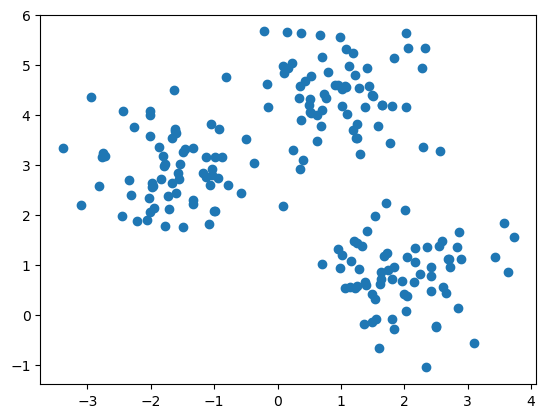

In [145]:
plt.scatter(X[:,0],X[:,1])

In [146]:
cluster_labels

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1], dtype=int64)

In [147]:
np.unique(cluster_labels) 

array([0, 1, 2], dtype=int64)

In [143]:
# 최적화된 bandwidth 찾아주는 함수 
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(X)

1.8158484154517098

## 실루엣 분석 시각화

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

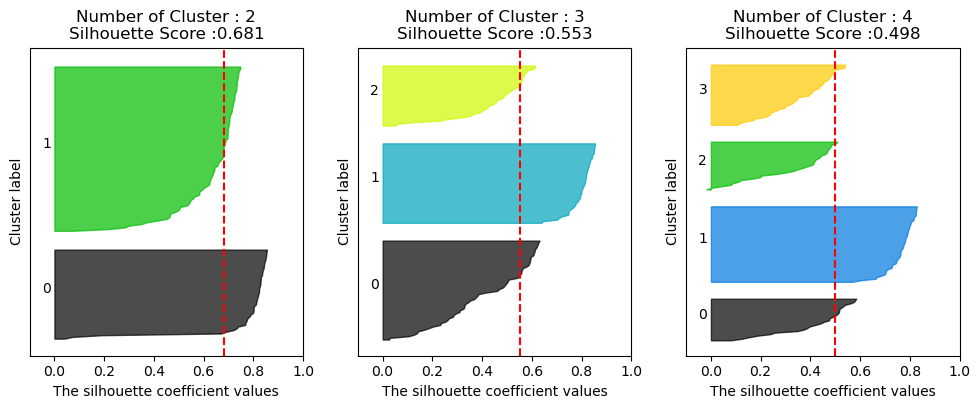

In [157]:
iris = load_iris()

visualize_silhouette([2,3,4],iris.data)

## GMM (가우시안 믹스쳐 모델)

In [161]:
X = iris.data
y = iris.target

In [162]:
from sklearn.mixture import GaussianMixture

In [163]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
gmm_labels = gmm.predict(X)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [164]:
np.unique(gmm_labels)

array([0, 1, 2], dtype=int64)

In [199]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False) 

NameError: name 'visualize_cluster_plot' is not defined

### GMM 을 이용한 붓꽃 데이터 셋 클러스터링

In [202]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [203]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### GMM과 K-평균의 비교

In [205]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

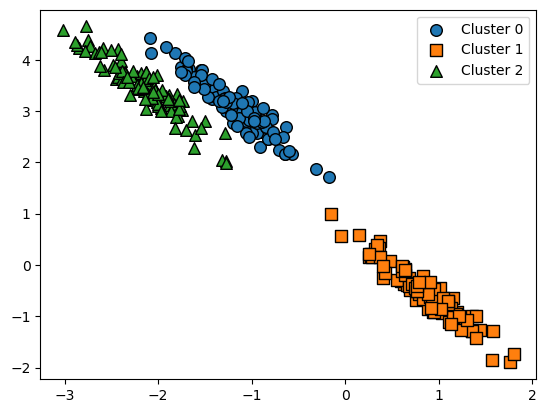

In [206]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


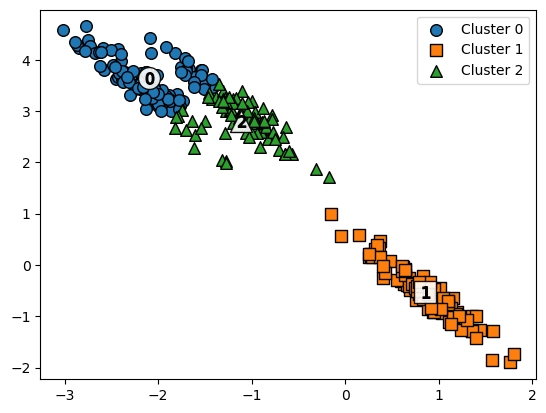

In [207]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


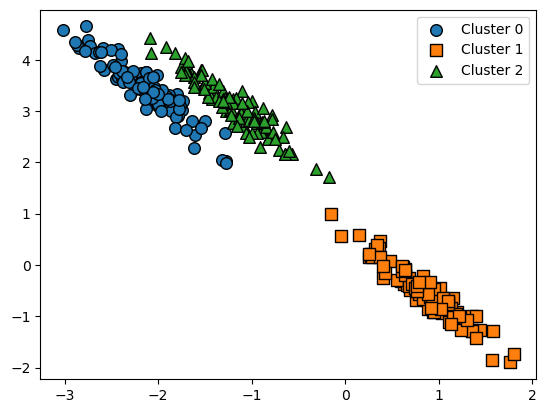

In [208]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [209]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# 6교시 : DBSCAN 적용하기 : 471p ~

In [214]:
from sklearn.datasets import make_circles

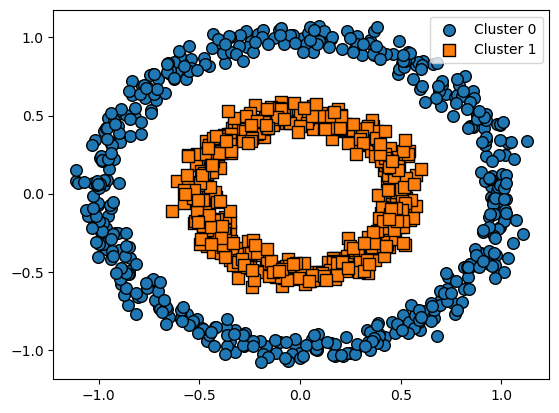

In [239]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

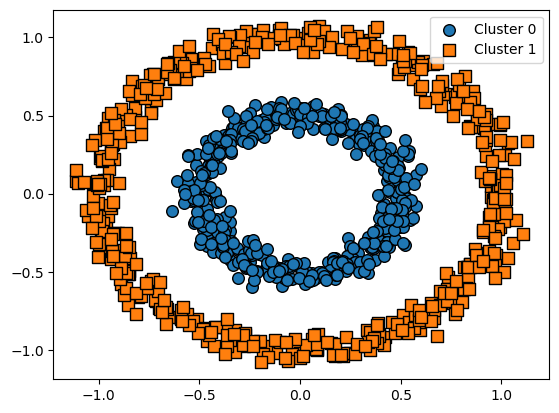

In [241]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_labels'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_labels', iscenter=False)

### 1. KMeans를 써서 2개로, visualize_cluster_plot
### 2. MeanShift로 2개로 군집
### 3. GMM을 써서 visualize_cluster_plot

In [242]:
gmm = GaussianMixture(n_components=2, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(kmeans, irisDF, 'iris_result', iscenter=True)



C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  gmm_cluster
0       0              50
1       1              50
2       1              50
Name: gmm_cluster, dtype: int64
target  kmeans_cluster
0       0                 50
1       1                 47
        0                  3
2       1                 50
Name: kmeans_cluster, dtype: int64


KeyError: 'iris_result'

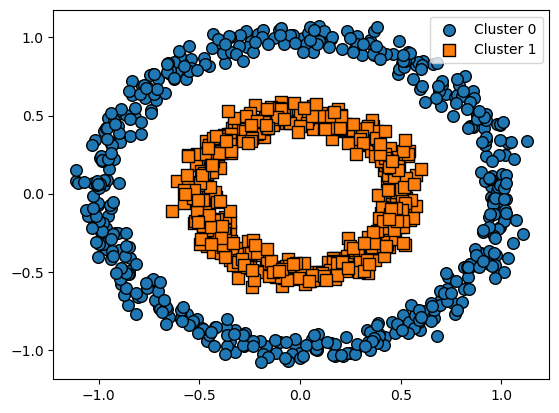

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


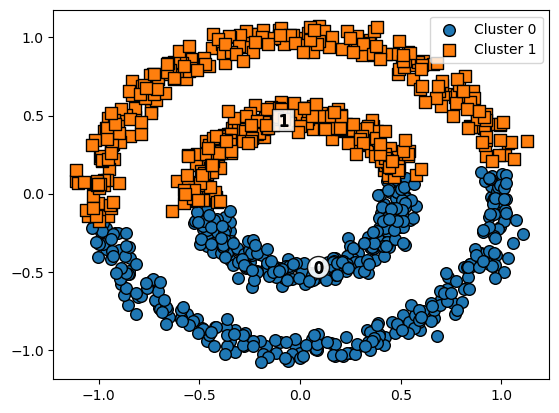

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


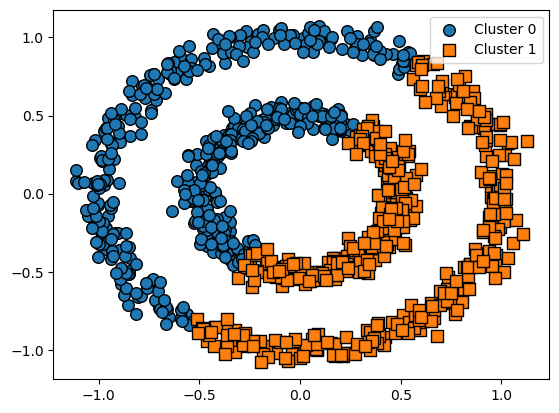

In [243]:
x,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

#
clusterDF = pd.DataFrame(data = x, columns=['ftr1','ftr2'])
clusterDF['target']=y
visualize_cluster_plot(None, clusterDF,'target',iscenter=False)

# KMeans
kmeans=KMeans(n_clusters=2, random_state=0)
clusterDF['kmeans_cluster']=kmeans.fit_predict(x)
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster',iscenter=True)

# GMM
gmm = GaussianMixture(n_components=2, random_state=0)
clusterDF['gmm_cluster']=gmm.fit_predict(x)
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster',iscenter=None) # GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 

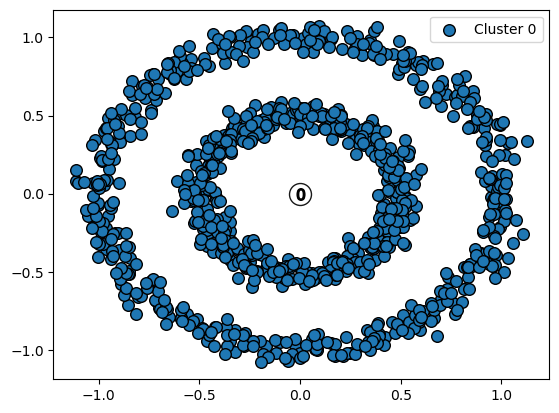

In [261]:
# MeanShift 
meanShift = MeanShift(bandwidth=estimate_bandwidth(x))
meanShift_label = meanShift.fit_predict(X)
clusterDF['meanshift_label'] = meanShift_label

visualize_cluster_plot(meanShift, clusterDF, 'meanshift_label',iscenter=True)

In [260]:
np.unique(meanShift_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [262]:
clusterDF

,ftr1,ftr2,target,kmeans_cluster,gmm_cluster,kmeans_label,meanshift_label
0,0.519781,-0.015981,1,0,1,0,0
1,-0.057719,-0.420279,1,0,1,0,0
2,-0.805155,-0.662227,0,0,0,0,0
3,0.316549,0.312730,1,1,1,1,0
4,-0.304804,0.407563,1,1,0,1,0
...,...,...,...,...,...,...,...
995,-0.222906,-0.326809,1,0,0,0,0
996,-0.766648,0.677558,0,1,0,1,0
997,-0.012036,0.396755,1,1,0,1,0
998,0.398129,0.318982,1,1,1,1,0
